In [1]:
import matplotlib.pyplot as plt
from pprint import pprint
from os import listdir
import pandas as pd
import numpy as np

In [2]:
ls = listdir('outputs/')
list = [l for l in ls if '.csv' in l]
list

avg_corr = {}

for filename in list:
    ingest = pd.read_csv('outputs/{}'.format(filename),header=None)
    corrMatrix = ingest.iloc[:,1:].corr()
    tri = np.triu(np.ones(corrMatrix.shape),1).astype(bool)
    cross = [[corrMatrix.iloc[x,y] if tri[x,y] else 0 for x in range(len(tri))] for y in range(len(corrMatrix))]
    avg = np.sum(cross) / np.count_nonzero(cross)
    avg_corr[filename[:-4]] = avg

pprint(avg_corr)

{'AsymmetricUtility': 0.9793917826311105,
 'BaseAt4': 0.9990406966624604,
 'Baseline': 0.9993653593508636,
 'Bimodal3and6': 0.8929659057777041,
 'BinomSym3': 0.9996786194708911,
 'BinomSym4': 0.9984692796627254,
 'BinomSym4LongRun': 0.9766878297988622,
 'FiveByNeighboorhoods': 0.9992804607818385,
 'Integrationist': 0.9041819060924364,
 'IntegrationistAsymmetric': 0.9987941147621255,
 'IntegrationistSparse': 0.9552039638356898,
 'IntegrationistWithEmpty': 0.8251296753956616,
 'LargeMajority': 0.9981457559336203,
 'LargeMajorityLowDensity': 0.9973101095131449,
 'LessAsymmetricUtility': 0.9959356131499515,
 'LessAsymmetricUtilityLessDenseLongRun': 0.9953599528782617,
 'LessAsymmetricUtilityLongRun': 0.9982665665443413,
 'SevenByNeighboorhoods': 0.9987265936770766,
 'SixGroups': 0.9995279887239704,
 'SixGroupsLongRun': 0.9998904424348918,
 'ThreeGroups': 0.9998012895522678,
 'test': 0.9983748163019193,
 'uniform0to6': 0.9924352614933506}


In [3]:
def compare(list):
    fig1 = plt.figure()
    ax1 = fig1.add_subplot(111)
    
    for filename in list:
        ingest = pd.read_csv('outputs/{}.csv'.format(filename),header=None)
        labs = [filename + '_Rep' + str(n) for n in range(1,ingest.shape[1])]
        df = ingest.iloc[:,1:].copy()
        df.columns=labs
        #display(df)
        #ax = df.plot()
        #ax1.plot(ax)
        ax1.plot(df, label=labs)
        #df.plot(x=df.iloc[0,1],y=df.iloc[0,2:])
    plt.legend(loc="best")
    plt.show()

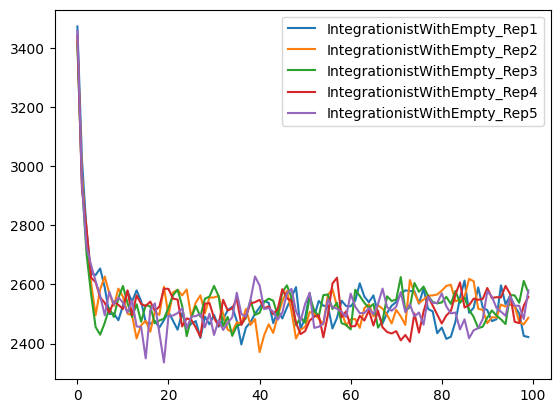

In [5]:
compare(['IntegrationistWithEmpty'])